Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Date:         01/14/2018
Name:         Laura Chen
Worked with:  N/A; referenced code examples from class

In [101]:
import csv
from datetime import datetime
from collections import Counter
import matplotlib as plt

#### Challenge 1   
  
- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

In [2]:
with open('turnstile_170422.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [6]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [55]:
#First four columns should be the key. The rest should be added to the list of values
d1={}
for row in rows:
    d1.setdefault(tuple(row[:4]),[]).append(row[4:])

In [62]:
d1[('A002', 'R051', '02-00-00', '59 ST')][0]

['NQR456W',
 'BMT',
 '04/15/2017',
 '00:00:00',
 'REGULAR',
 '0006136580',
 '0002078941']

#### Challenge 2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [422]:
d2= {turnstile: [(datetime.strptime(date + time,'%m/%d/%Y%X'),
                  int(entries)) for _,_,date,time,_,entries,_ in row]
                  for turnstile, row in d1.items()
                  }

In [81]:
for rows in d2.values():
    assert rows == sorted(rows)

In [82]:
#after sorting the values, get the number of hours passed between times and the difference in entry count
d2_time = {turnstile: [[rows[i][0],
                        rows[i+1][1] - rows[i][1],
                        rows[i+1][0] - rows[i][0]]
                        for i in range(len(rows) - 1)]
                        for turnstile, rows in d2.items()}

In [424]:
counts=[count for rows in d2_time.values() for _,count,_ in rows]
counts.sort()
counts[:20]

[-9415811,
 -6924152,
 -6314273,
 -465998,
 -347502,
 -229025,
 -165724,
 -162127,
 -45660,
 -29807,
 -8372,
 -2037,
 -2019,
 -1929,
 -1924,
 -1906,
 -1863,
 -1802,
 -1789,
 -1784]

In [99]:
d2_cleaned = {turnstile: [(time, count)
                for (time, count, _) in rows
                if 0 <= count <= 5000]
                for turnstile, rows in d2_time.items()}

#### Challenge 3

- These counts are for every n hours. (What is n?) We want total daily
  entries.

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [237]:
# dictionary of dictionaries
day_counts = {}
for turnstile, rows in d2_cleaned.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())
    

list(day_counts.items())[0]

2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 09:43:39
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00


2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 09:43:39
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00


2017-04-18 04:00:00
2017-04-18 07:14:48
2017-04-18 07:22:55
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00


2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 07:42:13
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00


2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00


2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00


2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00


2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 07:42:21
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00


2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00


2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00


2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00


2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 07:41:57
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 07:41:57
2017-04-17 08:00:00
2017-04-17 12:00:00


2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00


2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00


2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00


2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00


2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00


2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 08:01:39
2017-04-20 08:03:14
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00


2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00


2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 11:55:44
2017-04-21 11:58:25
2017-04-21 11:59:45
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00


2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00


2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00


2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00


2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00


2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 07:42:30
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00


2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00


2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00


2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00


2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00


2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00


2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00


2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00


2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00


2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00


2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:40
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 06:26:49
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:40
2017-04-20 12:00:00
2017-04-20 16:00:00


2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00


2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00


2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00


2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00


2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00


2017-04-16 03:00:00
2017-04-16 07:00:00
2017-04-16 11:00:00
2017-04-16 15:00:00
2017-04-16 19:00:00
2017-04-16 23:00:00
2017-04-17 03:00:00
2017-04-17 07:00:00
2017-04-17 11:00:00
2017-04-17 15:00:00
2017-04-17 19:00:00
2017-04-17 23:00:00
2017-04-18 03:00:00
2017-04-18 07:00:00
2017-04-18 11:00:00
2017-04-18 15:00:00
2017-04-18 19:00:00
2017-04-18 23:00:00
2017-04-19 03:00:00
2017-04-19 07:00:00
2017-04-19 11:00:00
2017-04-19 15:00:00
2017-04-19 19:00:00
2017-04-19 23:00:00
2017-04-20 03:00:00
2017-04-20 07:00:00
2017-04-20 11:00:00
2017-04-20 15:00:00
2017-04-20 19:00:00
2017-04-20 23:00:00
2017-04-21 03:00:00
2017-04-21 07:00:00
2017-04-21 11:00:00
2017-04-21 15:00:00
2017-04-21 19:00:00
2017-04-15 03:00:00
2017-04-15 07:00:00
2017-04-15 11:00:00
2017-04-15 15:00:00
2017-04-15 19:00:00
2017-04-15 23:00:00
2017-04-16 03:00:00
2017-04-16 07:00:00
2017-04-16 11:00:00
2017-04-16 15:00:00
2017-04-16 19:00:00
2017-04-16 23:00:00
2017-04-17 03:00:00
2017-04-17 07:00:00
2017-04-17 11:00:00


2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00


2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00


2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00


2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00


2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00


2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00


2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00


2017-04-15 00:22:00
2017-04-15 04:22:00
2017-04-15 08:22:00
2017-04-15 12:22:00
2017-04-15 16:22:00
2017-04-15 20:22:00
2017-04-16 00:22:00
2017-04-16 04:22:00
2017-04-16 08:22:00
2017-04-16 12:22:00
2017-04-16 16:22:00
2017-04-16 20:22:00
2017-04-17 00:22:00
2017-04-17 04:22:00
2017-04-17 08:22:00
2017-04-17 12:22:00
2017-04-17 16:22:00
2017-04-17 20:22:00
2017-04-18 00:22:00
2017-04-18 04:22:00
2017-04-18 08:22:00
2017-04-18 12:22:00
2017-04-18 16:22:00
2017-04-18 20:22:00
2017-04-19 00:22:00
2017-04-19 04:22:00
2017-04-19 08:22:00
2017-04-19 12:22:00
2017-04-19 16:22:00
2017-04-19 20:22:00
2017-04-20 00:22:00
2017-04-20 04:22:00
2017-04-20 08:22:00
2017-04-20 12:22:00
2017-04-20 16:22:00
2017-04-20 20:22:00
2017-04-21 00:22:00
2017-04-21 04:22:00
2017-04-21 08:22:00
2017-04-21 12:22:00
2017-04-21 16:22:00
2017-04-15 00:22:00
2017-04-15 04:22:00
2017-04-15 08:22:00
2017-04-15 12:22:00
2017-04-15 16:22:00
2017-04-15 20:22:00
2017-04-16 00:22:00
2017-04-16 04:22:00
2017-04-16 08:22:00


2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00


2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00


2017-04-19 18:00:00
2017-04-19 22:00:00
2017-04-20 02:00:00
2017-04-20 06:00:00
2017-04-20 10:00:00
2017-04-20 14:00:00
2017-04-20 18:00:00
2017-04-20 22:00:00
2017-04-21 02:00:00
2017-04-21 06:00:00
2017-04-21 10:00:00
2017-04-21 14:00:00
2017-04-21 18:00:00
2017-04-15 02:00:00
2017-04-15 06:00:00
2017-04-15 10:00:00
2017-04-15 14:00:00
2017-04-15 18:00:00
2017-04-15 22:00:00
2017-04-16 02:00:00
2017-04-16 06:00:00
2017-04-16 10:00:00
2017-04-16 14:00:00
2017-04-16 18:00:00
2017-04-16 22:00:00
2017-04-17 02:00:00
2017-04-17 06:00:00
2017-04-17 10:00:00
2017-04-17 14:00:00
2017-04-17 18:00:00
2017-04-17 22:00:00
2017-04-18 02:00:00
2017-04-18 06:00:00
2017-04-18 10:00:00
2017-04-18 14:00:00
2017-04-18 18:00:00
2017-04-18 22:00:00
2017-04-19 02:00:00
2017-04-19 06:00:00
2017-04-19 10:00:00
2017-04-19 14:00:00
2017-04-19 18:00:00
2017-04-19 22:00:00
2017-04-20 02:00:00
2017-04-20 06:00:00
2017-04-20 10:00:00
2017-04-20 14:00:00
2017-04-20 18:00:00
2017-04-20 22:00:00
2017-04-21 02:00:00


2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00


2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00


2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00


2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00


2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00


2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00


2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00


2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00


2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00


2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00


2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00


2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00


2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 08:00:51
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00


2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 07:42:54
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00


2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00


2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 11:08:32
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00


2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00


2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00


2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 08:03:08
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 07:26:22
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 08:03:08
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00


2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00


2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00


2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00


2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00


2017-04-17 23:54:35
2017-04-18 04:06:35
2017-04-18 08:18:35
2017-04-18 12:30:35
2017-04-18 16:42:35
2017-04-18 20:54:35
2017-04-19 01:06:35
2017-04-19 05:18:35
2017-04-19 09:30:35
2017-04-19 13:42:35
2017-04-19 17:54:35
2017-04-19 22:06:35
2017-04-20 02:18:35
2017-04-20 06:30:35
2017-04-20 10:42:35
2017-04-20 14:54:35
2017-04-20 19:06:35
2017-04-20 23:18:35
2017-04-21 03:30:35
2017-04-21 07:42:35
2017-04-21 11:54:35
2017-04-21 16:06:35
2017-04-15 03:09:59
2017-04-15 07:21:59
2017-04-15 11:33:59
2017-04-15 15:45:59
2017-04-15 19:57:59
2017-04-16 00:09:59
2017-04-16 04:21:59
2017-04-16 08:33:59
2017-04-16 12:45:59
2017-04-16 16:57:59
2017-04-16 21:09:59
2017-04-17 01:21:59
2017-04-17 05:33:59
2017-04-17 09:45:59
2017-04-17 13:57:59
2017-04-17 18:09:59
2017-04-17 22:21:59
2017-04-18 02:33:59
2017-04-18 06:59:59
2017-04-18 11:11:59
2017-04-18 15:23:59
2017-04-18 19:35:59
2017-04-18 23:47:59
2017-04-19 03:59:59
2017-04-19 08:11:59
2017-04-19 12:23:59
2017-04-19 16:35:59
2017-04-19 20:47:59


2017-04-16 00:22:33
2017-04-16 04:34:33
2017-04-16 08:46:33
2017-04-16 12:58:33
2017-04-16 17:10:33
2017-04-16 21:22:33
2017-04-17 01:34:33
2017-04-17 05:46:33
2017-04-17 09:58:33
2017-04-17 14:10:33
2017-04-17 18:22:33
2017-04-17 22:34:33
2017-04-18 02:46:33
2017-04-18 06:58:33
2017-04-18 11:10:33
2017-04-18 15:22:33
2017-04-18 19:34:33
2017-04-18 23:46:33
2017-04-19 03:58:33
2017-04-19 08:10:33
2017-04-19 12:22:33
2017-04-19 16:34:33
2017-04-19 20:46:33
2017-04-20 00:58:33
2017-04-20 05:10:33
2017-04-20 09:22:33
2017-04-20 13:34:33
2017-04-20 17:46:33
2017-04-20 21:58:33
2017-04-21 02:10:33
2017-04-21 06:22:33
2017-04-21 10:34:33
2017-04-21 14:46:33
2017-04-21 18:58:33
2017-04-15 03:40:39
2017-04-15 07:52:39
2017-04-15 12:04:39
2017-04-15 16:16:39
2017-04-15 20:28:39
2017-04-16 00:40:39
2017-04-16 04:52:39
2017-04-16 09:04:39
2017-04-16 13:16:39
2017-04-16 17:28:39
2017-04-16 21:40:39
2017-04-17 01:52:39
2017-04-17 06:04:39
2017-04-17 10:16:39
2017-04-17 14:28:39
2017-04-17 18:40:39


2017-04-15 20:40:18
2017-04-16 00:52:18
2017-04-16 05:04:18
2017-04-16 09:16:18
2017-04-16 13:28:18
2017-04-16 17:40:18
2017-04-16 21:52:18
2017-04-17 02:04:18
2017-04-17 06:16:18
2017-04-17 10:28:18
2017-04-17 14:40:18
2017-04-17 18:52:18
2017-04-17 23:04:18
2017-04-18 03:16:18
2017-04-18 07:28:18
2017-04-18 11:40:18
2017-04-18 15:52:18
2017-04-18 20:04:18
2017-04-19 00:16:18
2017-04-19 04:28:18
2017-04-19 08:40:18
2017-04-19 12:52:18
2017-04-19 17:04:18
2017-04-19 21:16:18
2017-04-20 01:28:18
2017-04-20 05:40:18
2017-04-20 09:42:06
2017-04-20 13:50:18
2017-04-20 17:53:24
2017-04-20 22:05:24
2017-04-21 02:17:24
2017-04-21 06:29:24
2017-04-21 10:41:24
2017-04-21 14:53:24
2017-04-21 19:05:24
2017-04-15 00:40:58
2017-04-15 04:52:58
2017-04-15 09:04:58
2017-04-15 13:16:58
2017-04-15 17:28:58
2017-04-15 21:40:58
2017-04-16 01:52:58
2017-04-16 06:04:58
2017-04-16 10:16:58
2017-04-16 14:28:58
2017-04-16 18:40:58
2017-04-16 22:52:58
2017-04-17 03:04:58
2017-04-17 07:16:58
2017-04-17 11:28:58


2017-04-16 17:12:53
2017-04-16 21:38:53
2017-04-17 01:50:53
2017-04-17 06:02:53
2017-04-17 10:14:53
2017-04-17 14:26:53
2017-04-17 18:38:53
2017-04-17 23:04:53
2017-04-18 03:16:53
2017-04-18 07:28:53
2017-04-18 11:40:53
2017-04-18 15:52:53
2017-04-18 20:04:53
2017-04-19 00:16:53
2017-04-19 04:28:53
2017-04-19 08:40:53
2017-04-19 12:52:53
2017-04-19 17:04:53
2017-04-19 21:16:53
2017-04-20 01:28:53
2017-04-20 05:40:53
2017-04-20 09:52:53
2017-04-20 14:04:53
2017-04-20 18:16:53
2017-04-20 22:28:53
2017-04-21 02:40:53
2017-04-21 06:52:53
2017-04-21 11:04:53
2017-04-21 15:16:53
2017-04-21 19:28:53
2017-04-15 03:49:04
2017-04-15 08:01:04
2017-04-15 12:13:04
2017-04-15 16:25:04
2017-04-15 20:37:04
2017-04-16 00:49:04
2017-04-16 05:01:04
2017-04-16 09:13:04
2017-04-16 13:25:04
2017-04-16 17:37:04
2017-04-16 22:03:04
2017-04-17 02:15:04
2017-04-17 10:44:51
2017-04-17 14:56:48
2017-04-17 19:08:48
2017-04-17 23:20:48
2017-04-18 03:32:48
2017-04-18 07:44:48
2017-04-18 11:56:48
2017-04-18 16:08:48


2017-04-19 02:04:23
2017-04-19 06:16:23
2017-04-19 10:28:23
2017-04-19 14:40:23
2017-04-19 18:52:23
2017-04-19 23:04:23
2017-04-20 03:16:23
2017-04-20 07:28:23
2017-04-20 11:40:23
2017-04-20 15:52:23
2017-04-20 20:04:23
2017-04-21 00:16:23
2017-04-21 04:28:23
2017-04-21 08:40:23
2017-04-21 12:52:23
2017-04-21 17:04:23
2017-04-15 00:33:19
2017-04-15 04:45:19
2017-04-15 08:57:19
2017-04-15 13:09:19
2017-04-15 17:21:19
2017-04-15 21:33:19
2017-04-16 01:45:19
2017-04-16 05:57:19
2017-04-16 10:09:19
2017-04-16 14:21:19
2017-04-16 18:33:19
2017-04-16 22:45:19
2017-04-17 02:57:19
2017-04-17 07:09:19
2017-04-17 11:21:19
2017-04-17 15:33:19
2017-04-17 19:45:19
2017-04-17 23:57:19
2017-04-18 04:09:19
2017-04-18 08:21:19
2017-04-18 12:33:19
2017-04-18 16:45:19
2017-04-18 20:57:19
2017-04-19 01:09:19
2017-04-19 05:21:19
2017-04-19 09:33:19
2017-04-19 13:45:19
2017-04-19 17:57:19
2017-04-19 22:09:19
2017-04-20 02:21:19
2017-04-20 06:33:19
2017-04-20 10:45:19
2017-04-20 14:57:19
2017-04-20 19:09:19


2017-04-19 15:00:32
2017-04-19 19:12:32
2017-04-19 23:24:32
2017-04-20 03:36:32
2017-04-20 07:48:32
2017-04-20 12:00:32
2017-04-20 16:12:32
2017-04-20 20:24:32
2017-04-21 00:36:32
2017-04-21 04:48:32
2017-04-21 09:00:32
2017-04-21 13:12:32
2017-04-21 17:24:32
2017-04-15 02:32:59
2017-04-15 06:44:59
2017-04-15 10:49:47
2017-04-15 15:01:47
2017-04-15 19:13:47
2017-04-15 23:25:47
2017-04-16 03:37:47
2017-04-16 07:49:47
2017-04-16 12:01:47
2017-04-16 16:13:47
2017-04-16 20:25:47
2017-04-17 00:37:47
2017-04-17 04:49:47
2017-04-17 09:01:47
2017-04-17 13:13:47
2017-04-17 17:25:47
2017-04-17 21:37:47
2017-04-18 01:49:47
2017-04-18 06:01:47
2017-04-18 10:13:47
2017-04-18 14:25:47
2017-04-18 18:37:47
2017-04-18 22:49:47
2017-04-19 03:01:47
2017-04-19 07:13:47
2017-04-19 11:25:47
2017-04-19 15:37:47
2017-04-19 19:49:47
2017-04-20 00:01:47
2017-04-20 04:13:47
2017-04-20 08:25:47
2017-04-20 12:37:47
2017-04-20 16:49:47
2017-04-20 21:01:47
2017-04-21 01:13:47
2017-04-21 05:25:47
2017-04-21 09:37:47


2017-04-15 18:39:41
2017-04-15 22:51:41
2017-04-16 03:03:41
2017-04-16 07:15:41
2017-04-16 11:27:41
2017-04-16 15:39:41
2017-04-16 19:51:41
2017-04-17 00:03:41
2017-04-17 04:29:41
2017-04-17 08:41:41
2017-04-17 12:53:41
2017-04-17 17:05:41
2017-04-17 21:17:41
2017-04-18 01:29:41
2017-04-18 05:41:41
2017-04-18 09:53:41
2017-04-18 14:05:41
2017-04-18 18:17:41
2017-04-18 22:29:41
2017-04-19 02:41:41
2017-04-19 06:53:41
2017-04-19 11:05:41
2017-04-19 15:17:41
2017-04-19 19:29:41
2017-04-19 23:41:41
2017-04-20 03:53:41
2017-04-20 08:05:41
2017-04-20 12:17:41
2017-04-20 16:29:41
2017-04-20 20:41:41
2017-04-21 00:53:41
2017-04-21 05:05:41
2017-04-21 09:17:41
2017-04-21 13:29:41
2017-04-21 17:41:41
2017-04-15 03:55:45
2017-04-15 08:07:45
2017-04-15 12:19:45
2017-04-15 16:31:45
2017-04-15 20:31:48
2017-04-16 00:43:48
2017-04-16 04:55:48
2017-04-16 09:07:48
2017-04-16 13:19:48
2017-04-16 17:31:48
2017-04-16 21:43:48
2017-04-17 01:55:48
2017-04-17 06:07:48
2017-04-17 10:19:48
2017-04-17 14:31:48


2017-04-15 09:57:13
2017-04-15 14:09:13
2017-04-15 18:21:13
2017-04-15 22:33:13
2017-04-16 02:45:13
2017-04-16 06:57:13
2017-04-16 11:09:13
2017-04-16 15:21:13
2017-04-16 19:33:13
2017-04-16 23:45:13
2017-04-17 03:57:13
2017-04-17 08:09:13
2017-04-17 12:21:13
2017-04-17 16:33:13
2017-04-17 20:45:13
2017-04-18 00:57:13
2017-04-18 05:09:13
2017-04-18 09:21:13
2017-04-18 13:33:13
2017-04-18 17:45:13
2017-04-18 21:57:13
2017-04-19 02:09:13
2017-04-19 06:21:13
2017-04-19 10:33:13
2017-04-19 14:45:13
2017-04-19 18:57:13
2017-04-19 23:09:13
2017-04-20 03:21:13
2017-04-20 07:33:13
2017-04-20 11:45:13
2017-04-20 15:57:13
2017-04-20 20:09:13
2017-04-21 00:21:13
2017-04-21 04:33:13
2017-04-21 08:45:13
2017-04-21 12:57:13
2017-04-21 17:09:13
2017-04-15 03:33:24
2017-04-15 07:45:24
2017-04-15 11:57:24
2017-04-15 16:09:24
2017-04-15 20:21:24
2017-04-16 00:33:24
2017-04-16 04:45:24
2017-04-16 08:57:24
2017-04-16 13:09:24
2017-04-16 17:21:24
2017-04-16 21:33:24
2017-04-17 01:45:24
2017-04-17 05:57:24


2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-21 20:35:19
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00


2017-04-20 03:00:00
2017-04-20 07:00:00
2017-04-20 11:00:00
2017-04-20 15:00:00
2017-04-20 19:00:00
2017-04-20 23:00:00
2017-04-21 03:00:00
2017-04-21 07:00:00
2017-04-21 11:00:00
2017-04-21 15:00:00
2017-04-21 19:00:00
2017-04-15 03:00:00
2017-04-15 07:00:00
2017-04-15 11:00:00
2017-04-15 15:00:00
2017-04-15 19:00:00
2017-04-15 23:00:00
2017-04-16 03:00:00
2017-04-16 07:00:00
2017-04-16 11:00:00
2017-04-16 15:00:00
2017-04-16 19:00:00
2017-04-16 23:00:00
2017-04-17 03:00:00
2017-04-17 07:00:00
2017-04-17 11:00:00
2017-04-17 15:00:00
2017-04-17 19:00:00
2017-04-17 23:00:00
2017-04-18 03:00:00
2017-04-18 07:00:00
2017-04-18 11:00:00
2017-04-18 15:00:00
2017-04-18 19:00:00
2017-04-18 23:00:00
2017-04-19 03:00:00
2017-04-19 07:00:00
2017-04-19 11:00:00
2017-04-19 15:00:00
2017-04-19 19:00:00
2017-04-19 23:00:00
2017-04-20 03:00:00
2017-04-20 07:00:00
2017-04-20 11:00:00
2017-04-20 15:00:00
2017-04-20 19:00:00
2017-04-20 23:00:00
2017-04-21 03:00:00
2017-04-21 07:00:00
2017-04-21 11:00:00


2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00


2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00


2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00


2017-04-20 02:00:00
2017-04-20 06:00:00
2017-04-20 10:00:00
2017-04-20 14:00:00
2017-04-20 18:00:00
2017-04-20 22:00:00
2017-04-21 02:00:00
2017-04-21 06:00:00
2017-04-21 10:00:00
2017-04-21 14:00:00
2017-04-21 18:00:00
2017-04-15 02:00:00
2017-04-15 06:00:00
2017-04-15 10:00:00
2017-04-15 14:00:00
2017-04-15 18:00:00
2017-04-15 22:00:00
2017-04-16 02:00:00
2017-04-16 06:00:00
2017-04-16 10:00:00
2017-04-16 14:00:00
2017-04-16 18:00:00
2017-04-16 22:00:00
2017-04-17 02:00:00
2017-04-17 06:00:00
2017-04-17 10:00:00
2017-04-17 14:00:00
2017-04-17 18:00:00
2017-04-17 22:00:00
2017-04-18 02:00:00
2017-04-18 06:00:00
2017-04-18 10:00:00
2017-04-18 14:00:00
2017-04-18 18:00:00
2017-04-18 22:00:00
2017-04-19 02:00:00
2017-04-19 06:00:00
2017-04-19 10:00:00
2017-04-19 14:00:00
2017-04-19 18:00:00
2017-04-19 22:00:00
2017-04-20 02:00:00
2017-04-20 06:00:00
2017-04-20 10:00:00
2017-04-20 14:00:00
2017-04-20 18:00:00
2017-04-20 22:00:00
2017-04-21 02:00:00
2017-04-21 06:00:00
2017-04-21 10:00:00


2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 07:43:48
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 07:43:48
2017-04-17 08:00:00
2017-04-17 12:00:00


2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00


2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00


2017-04-19 20:42:49
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00


2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00


2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00


2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00


2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00


2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00


2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00


2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00


2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00


2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00
2017-04-16 05:00:00
2017-04-16 09:00:00
2017-04-16 13:00:00
2017-04-16 17:00:00
2017-04-16 21:00:00
2017-04-17 01:00:00
2017-04-17 05:00:00
2017-04-17 09:00:00
2017-04-17 13:00:00
2017-04-17 17:00:00
2017-04-17 21:00:00
2017-04-18 01:00:00
2017-04-18 05:00:00
2017-04-18 06:32:16
2017-04-18 09:00:00
2017-04-18 13:00:00
2017-04-18 17:00:00
2017-04-18 21:00:00
2017-04-19 01:00:00
2017-04-19 05:00:00
2017-04-19 09:00:00
2017-04-19 13:00:00
2017-04-19 17:00:00
2017-04-19 21:00:00
2017-04-20 01:00:00
2017-04-20 05:00:00
2017-04-20 09:00:00
2017-04-20 13:00:00
2017-04-20 17:00:00
2017-04-20 17:08:35
2017-04-20 21:00:00
2017-04-21 01:00:00
2017-04-21 05:00:00
2017-04-21 09:00:00
2017-04-21 13:00:00
2017-04-21 17:00:00
2017-04-15 01:00:00
2017-04-15 05:00:00
2017-04-15 09:00:00
2017-04-15 13:00:00
2017-04-15 17:00:00
2017-04-15 21:00:00
2017-04-16 01:00:00


2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00


2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00


2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00
2017-04-16 04:00:00
2017-04-16 08:00:00
2017-04-16 12:00:00
2017-04-16 16:00:00
2017-04-16 20:00:00
2017-04-17 00:00:00
2017-04-17 04:00:00
2017-04-17 08:00:00
2017-04-17 12:00:00
2017-04-17 16:00:00
2017-04-17 20:00:00
2017-04-18 00:00:00
2017-04-18 04:00:00
2017-04-18 08:00:00
2017-04-18 12:00:00
2017-04-18 16:00:00
2017-04-18 20:00:00
2017-04-19 00:00:00
2017-04-19 04:00:00
2017-04-19 08:00:00
2017-04-19 12:00:00
2017-04-19 16:00:00
2017-04-19 20:00:00
2017-04-20 00:00:00
2017-04-20 04:00:00
2017-04-20 08:00:00
2017-04-20 12:00:00
2017-04-20 16:00:00
2017-04-20 20:00:00
2017-04-21 00:00:00
2017-04-21 04:00:00
2017-04-21 08:00:00
2017-04-21 09:40:43
2017-04-21 12:00:00
2017-04-21 16:00:00
2017-04-15 00:00:00
2017-04-15 04:00:00
2017-04-15 08:00:00
2017-04-15 12:00:00
2017-04-15 16:00:00
2017-04-15 20:00:00
2017-04-16 00:00:00


KeyboardInterrupt: 

In [104]:
day_counts

{('A002', 'R051', '02-00-00', '59 ST'): [(datetime.date(2017, 4, 15), 1152),
  (datetime.date(2017, 4, 16), 647),
  (datetime.date(2017, 4, 17), 1464),
  (datetime.date(2017, 4, 18), 1958),
  (datetime.date(2017, 4, 19), 1893),
  (datetime.date(2017, 4, 20), 2047),
  (datetime.date(2017, 4, 21), 2028)],
 ('A002', 'R051', '02-00-01', '59 ST'): [(datetime.date(2017, 4, 15), 422),
  (datetime.date(2017, 4, 16), 466),
  (datetime.date(2017, 4, 17), 1040),
  (datetime.date(2017, 4, 18), 549),
  (datetime.date(2017, 4, 19), 694),
  (datetime.date(2017, 4, 20), 637),
  (datetime.date(2017, 4, 21), 360)],
 ('A002', 'R051', '02-03-00', '59 ST'): [(datetime.date(2017, 4, 15), 420),
  (datetime.date(2017, 4, 16), 264),
  (datetime.date(2017, 4, 17), 474),
  (datetime.date(2017, 4, 18), 531),
  (datetime.date(2017, 4, 19), 608),
  (datetime.date(2017, 4, 20), 647),
  (datetime.date(2017, 4, 21), 596)],
 ('A002', 'R051', '02-03-01', '59 ST'): [(datetime.date(2017, 4, 15), 1109),
  (datetime.date(20

#### Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

In [432]:
turnstile1=day_counts[('A002', 'R051', '02-00-00', '59 ST')]
dates =[date for date, count in turnstile1]
counts=[count for date,count in turnstile1]

ValueError: x and y must have same first dimension, but have shapes (7,) and (192663,)

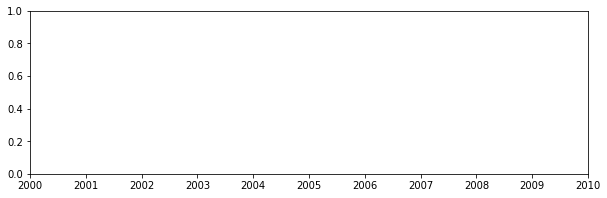

In [431]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

#### Challenge 5

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstilea-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.

In [314]:
#first group together the turnstiles by station, then take the counts and sum them together
grpd={}
for turnstile, row in day_counts.items():
    grpd.setdefault(tuple([turnstile[0],turnstile[1],turnstile[3]]),[]).append(row)

grpd2={}
for grp,row in grpd.items():
    for data in row: #looking at all data from one station
        by_day={}
        for date,count in data: #building a dictionary of sums for each date by station   
            by_day[date] = by_day.get(date, 0) + count
    grpd2.setdefault(grp,list(by_day.items()))
grpd2

{('A002', 'R051', '59 ST'): [(datetime.date(2017, 4, 15), 901),
  (datetime.date(2017, 4, 16), 687),
  (datetime.date(2017, 4, 17), 1676),
  (datetime.date(2017, 4, 18), 1741),
  (datetime.date(2017, 4, 19), 1754),
  (datetime.date(2017, 4, 20), 1779),
  (datetime.date(2017, 4, 21), 1597)],
 ('A006', 'R079', '5 AV/59 ST'): [(datetime.date(2017, 4, 15), 1289),
  (datetime.date(2017, 4, 16), 1436),
  (datetime.date(2017, 4, 17), 2277),
  (datetime.date(2017, 4, 18), 2534),
  (datetime.date(2017, 4, 19), 2487),
  (datetime.date(2017, 4, 20), 2565),
  (datetime.date(2017, 4, 21), 2272)],
 ('A007', 'R079', '5 AV/59 ST'): [(datetime.date(2017, 4, 15), 1507),
  (datetime.date(2017, 4, 16), 1894),
  (datetime.date(2017, 4, 17), 1777),
  (datetime.date(2017, 4, 18), 1814),
  (datetime.date(2017, 4, 19), 1672),
  (datetime.date(2017, 4, 20), 1636),
  (datetime.date(2017, 4, 21), 1627)],
 ('A010', 'R080', '57 ST-7 AV'): [(datetime.date(2017, 4, 15), 3431),
  (datetime.date(2017, 4, 16), 2596),
  

#### Challenge 6

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.

In [329]:
grpdStations={}
for turnstile, row in grpd2.items():
    grpdStations.setdefault(turnstile[2],[]).append(row)
    
grpdStations2={}
for grp,row in grpdStations.items():
    for data in row: #looking at all data from one station
        by_day={}
        for date,count in data: #building a dictionary of sums for each date by station   
            by_day[date] = by_day.get(date, 0) + count
    grpdStations2.setdefault(grp,list(by_day.items()))
grpdStations2

{'1 AV': [(datetime.date(2017, 4, 15), 3275),
  (datetime.date(2017, 4, 16), 2430),
  (datetime.date(2017, 4, 17), 3755),
  (datetime.date(2017, 4, 18), 4056),
  (datetime.date(2017, 4, 19), 4403),
  (datetime.date(2017, 4, 20), 4663),
  (datetime.date(2017, 4, 21), 3195)],
 '103 ST': [(datetime.date(2017, 4, 15), 1755),
  (datetime.date(2017, 4, 16), 1480),
  (datetime.date(2017, 4, 17), 2065),
  (datetime.date(2017, 4, 18), 2294),
  (datetime.date(2017, 4, 19), 2428),
  (datetime.date(2017, 4, 20), 2369),
  (datetime.date(2017, 4, 21), 2217)],
 '104 ST': [(datetime.date(2017, 4, 18), 0), (datetime.date(2017, 4, 20), 0)],
 '111 ST': [(datetime.date(2017, 4, 15), 233),
  (datetime.date(2017, 4, 16), 157),
  (datetime.date(2017, 4, 17), 440),
  (datetime.date(2017, 4, 18), 403),
  (datetime.date(2017, 4, 19), 561),
  (datetime.date(2017, 4, 20), 538),
  (datetime.date(2017, 4, 21), 468)],
 '116 ST': [(datetime.date(2017, 4, 15), 0),
  (datetime.date(2017, 4, 16), 0),
  (datetime.date(20

#### Challenge 7

Plot the time series for a station.


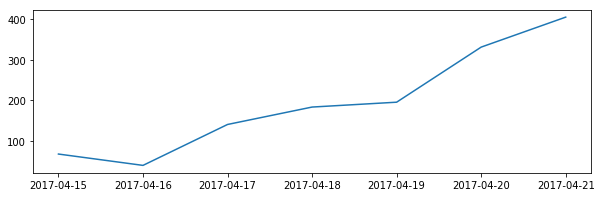

In [337]:
stat59=grpdStations2['59 ST']
dates= [date for date,count in stat59]
counts= [count for date,count in stat59]

plt.figure(figsize=(10,3))
plt.plot(dates,counts)

#### Challenge 8

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.

In [340]:
#switching to pandas for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline

In [339]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    # base url
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        # concat our week onto url.. 
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df = get_data(week_nums)

In [350]:
mask = (turnstiles_df["STATION"] == "59 ST")
turnstiles_df[mask].head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST   NQR456      BMT  08/27/2016  00:00:00   
1  A002  R051  02-00-00   59 ST   NQR456      BMT  08/27/2016  04:00:00   
2  A002  R051  02-00-00   59 ST   NQR456      BMT  08/27/2016  08:00:00   
3  A002  R051  02-00-00   59 ST   NQR456      BMT  08/27/2016  12:00:00   
4  A002  R051  02-00-00   59 ST   NQR456      BMT  08/27/2016  16:00:00   

      DESC  ENTRIES  \
0  REGULAR  5799442   
1  REGULAR  5799463   
2  REGULAR  5799492   
3  REGULAR  5799610   
4  REGULAR  5799833   

   EXITS                                                                 \
0                                            1966041                      
1                                            1966044                      
2                                            1966079                      
3                                            1966155                      
4                                            1966214                      

            DATE_TIME       DAY  DAY_NUM  
0 2016-08-27 00:00:00  Saturday        5  
1 2016-08-27 04:00:00  Saturday        5  
2 2016-08-27 08:00:00  Saturday        5  
3 2016-08-27 12:00:00  Saturday        5  
4 2016-08-27 16:00:00  Saturday        5

In [423]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " +turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [384]:
turnstiles_daily = turnstiles_df.groupby\
                (["C/A", "UNIT", "SCP", "STATION", "DATE_TIME","DATE"])\
                .ENTRIES.first().reset_index()
        
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [385]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [386]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"],row['C/A'],row['UNIT'],
             row['SCP'],row['STATION'])
        # assumption is that 
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

194 1894869311.0 A011 R080 01-00-04 57 ST-7 AV
262166 67111299.0 A016 R081 03-06-01 49 ST
20 1054580.0 JFK02 R535 01-00-02 HOWARD BCH JFK
2213 2044932.0 N089 R139 00-03-01 CANAL ST
1912605681 7509507.0 N100 R252 00-00-02 HIGH ST
148 1494569141.0 N128 R200 00-00-02 EUCLID AV
2214 14129759.0 N128 R200 00-00-05 EUCLID AV
67108864 0.0 N206 R104 01-05-01 167 ST
335599567 1374824.0 N225 R157 01-00-01 NORWOOD 205 ST
36 3252790.0 N529 R257 00-00-01 EAST BROADWAY
1117 3665629.0 N532 R129 00-00-02 BERGEN ST
262269 10823938.0 N600 R302 00-06-03 57 ST
387 1460418.0 PTH04 R551 00-01-01 GROVE STREET
1154414025 8957775.0 R126 R189 01-00-02 CHRISTOPHER ST
100663296 35655801.0 R148 R033 01-06-00 TIMES SQ-42 ST
211 1014755.0 R158 R084 00-06-03 59 ST COLUMBUS
186916225 604712476.0 R175 R169 01-00-04 137 ST CITY COL
151 6131096.0 R242 R049 01-00-02 51 ST
329 11078609.0 R256 R182 00-00-02 116 ST
553 74672293.0 R305 R206 01-00-00 125 ST
0 117440532.0 R317 R408 01-05-01 SIMPSON ST
100663296 1299.0 R327 R361 

In [398]:
turnstiles_daily.head()

C/A  UNIT       SCP STATION           DATE_TIME        DATE  ENTRIES  \
1  A002  R051  02-00-00   59 ST 2016-08-27 04:00:00  08/27/2016  5799463   
2  A002  R051  02-00-00   59 ST 2016-08-27 08:00:00  08/27/2016  5799492   
3  A002  R051  02-00-00   59 ST 2016-08-27 12:00:00  08/27/2016  5799610   
4  A002  R051  02-00-00   59 ST 2016-08-27 16:00:00  08/27/2016  5799833   
5  A002  R051  02-00-00   59 ST 2016-08-27 20:00:00  08/27/2016  5800121   

            PREV_DATE  PREV_ENTRIES  DAILY_ENTRIES       DAY  DAY_NUM  
1 2016-08-27 00:00:00     5799442.0           21.0  Saturday        5  
2 2016-08-27 04:00:00     5799463.0           29.0  Saturday        5  
3 2016-08-27 08:00:00     5799492.0          118.0  Saturday        5  
4 2016-08-27 12:00:00     5799610.0          223.0  Saturday        5  
5 2016-08-27 16:00:00     5799833.0          288.0  Saturday        5

In [388]:
weekdays = ['Monday', 'Tuesday', 
            'Wednesday', 'Thursday', 
            'Friday', 'Saturday', 'Sunday']

turnstiles_daily['DAY'] = turnstiles_daily['DATE_TIME'].apply(lambda x: weekdays[x.weekday()])
turnstiles_daily['DAY_NUM'] = turnstiles_daily['DATE_TIME'].apply(lambda x: x.weekday())

In [407]:
week1=turnstiles_daily[(turnstiles_daily['STATION']=='59 ST') & (turnstiles_daily['DATE']<='09/03/2016')]\
                        .groupby('DAY_NUM').DAILY_ENTRIES.sum()
week2=turnstiles_daily[(turnstiles_daily['STATION']=='59 ST') & (turnstiles_daily['DATE']>'09/03/2016') \
                        & (turnstiles_daily['DATE']<='09/10/2016')]\
                        .groupby('DAY_NUM').DAILY_ENTRIES.sum()
week3=turnstiles_daily[(turnstiles_daily['STATION']=='59 ST') & (turnstiles_daily['DATE']>'09/10/2016') \
                        & (turnstiles_daily['DATE']<='09/17/2016')]\
                        .groupby('DAY_NUM').DAILY_ENTRIES.sum()

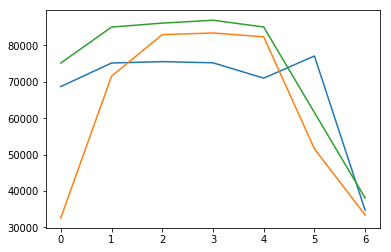

In [408]:
plt.plot(week1)
plt.plot(week2)
plt.plot(week3)

#### Challenge 9

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [413]:
total_ridership_counts=turnstiles_daily.groupby('STATION').DAILY_ENTRIES.sum().sort_values(ascending=False)

In [416]:
total_ridership_counts

STATION
34 ST-PENN STA     2939349.0
GRD CNTRL-42 ST    2524667.0
34 ST-HERALD SQ    2120443.0
23 ST              2096393.0
CANAL ST           1988715.0
14 ST-UNION SQ     1880523.0
86 ST              1841883.0
42 ST-PORT AUTH    1815299.0
TIMES SQ-42 ST     1746725.0
FULTON ST          1661356.0
CITY / BUS         1553629.0
125 ST             1491078.0
HOWARD BCH JFK     1389728.0
59 ST              1371659.0
96 ST              1316102.0
59 ST COLUMBUS     1302870.0
JFK JAMAICA CT1    1242806.0
CHAMBERS ST        1144268.0
FLUSHING-MAIN      1137239.0
14 ST              1100319.0
LACKAWANNA         1001364.0
47-50 STS ROCK      944312.0
JKSN HT-ROOSVLT     913029.0
28 ST               876420.0
82 ST-JACKSON H     869484.0
72 ST               869361.0
50 ST               844770.0
JAY ST-METROTEC     797618.0
W 4 ST-WASH SQ      769928.0
8 AV                757560.0
                     ...    
AVENUE P             42691.0
AQUEDUCT RACETR      41713.0
MORRIS PARK          40107.0
BUSHWI

#### Challenge 10

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

(array([ 267.,   63.,   21.,    6.,    5.,    4.,    4.,    2.,    1.,    1.]),
 array([  1.00000000e+00,   2.93935800e+05,   5.87870600e+05,
          8.81805400e+05,   1.17574020e+06,   1.46967500e+06,
          1.76360980e+06,   2.05754460e+06,   2.35147940e+06,
          2.64541420e+06,   2.93934900e+06]),
 <a list of 10 Patch objects>)

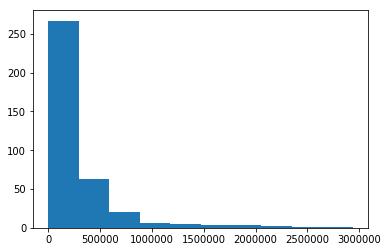

In [417]:
plt.hist(total_ridership_counts)